# Algebra lineal con **SciPy**

Referencias:

- https://docs.scipy.org/doc/scipy/reference/linalg.html
- https://www.datacamp.com/cheat-sheet/scipy-cheat-sheet-linear-algebra-in-python

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.


In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** Inversa de una matriz

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv

**1)** Use `linalg.inv()` para calcular la inversa $A^{-1}$ de la matriz

\begin{equation}
A = \bigg(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\bigg)
\end{equation}

**2)** Use `np.dot()` para chequear que $A^{-1}A \approx \mathbb{I}$, donde $\mathbb{I}$ es la matriz identidad.

**3)** Chequee que $AA^{-1} \approx \mathbb{I}$.


In [2]:
A = np.array([[1, 2], [3, 4]])
A_inv = linalg.inv(A)
print("Inversa de A:")
print(A_inv)


# 2.2)

I_approx1 = np.dot(A_inv, A)
print("\nProducto A_inv * A (debería ser la identidad):")
print(I_approx1)

# 2.3)
I_approx2 = np.dot(A, A_inv)
print("\nProducto A * A_inv (debería ser la identidad):")
print(I_approx2)

Inversa de A:
[[-2.   1. ]
 [ 1.5 -0.5]]

Producto A_inv * A (debería ser la identidad):
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]

Producto A * A_inv (debería ser la identidad):
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


## **Ejercicio 3)** Sistema de ecuaciones lineales

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

**1)** Use `linalg.solve()` para resolver el sistema $Ax=b$ donde, $x$ es la incógnita,

\begin{equation}
A = \left(
\begin{array}{cc}
3 & 2 & 0 \\
1 & -1 & 0 \\
0 & 5 & 1
\end{array}
\right)
\end{equation}

y

\begin{equation}
b = \left(
\begin{array}{cc}
2 \\
4 \\
1
\end{array}
\right)
\end{equation}

**2)** Chequee que $Ax=b$.


In [ ]:
# 3.1)

A = np.array([[3, 2, 0], [1, -1 , 0], [0, 5, 1]])
b = np.array([2, 4, 1]) # b = np.array([[2], [4], [1]])  # Alternativa como vector columna

x = linalg.solve(A, b)
print("\nSolución del sistema Ax = b:")
print(x)

# 3.2)
print("Chequeo de la solución: ")
print(np.allclose(np.dot(A, x), b))  # Debería ser True


Solución del sistema Ax = b:
[ 2. -2. 11.]
Chequeo de la solución: 
True


## **Ejercicio 4)** Cuadrados mínimos

Dada una matriz $X$ de dimensiones $n\times m$ y un vector $y$ de dimensión $n$, la función `linalg.lstsq(X,y,...)` se usa para encontrar el vector $y$ de dimensión $m$ que minimize la norma L2 dada por $|y-Xc|$ con respecto al vector $c$ de dimensión $m$. Notar que minimizar esta cantidad no necesariamente implica que $Xc=y$. Minimizar $|y-Xc|$ es útil para infinidad de problemas. En particular, es útil para ajustar polinomios a curvas obtenidas de datos.

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq

**1)** Use `linalg.lstsq(X,y)` para encontrar los coeficientes $c_0$, $c_1$ y $c_2$ del polinomio $p(x)=c_0+c_1x+c_2x^2$ que ajuste lo mejor posible los siguientes datos

    x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
    y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

de acuerdo al método de cuadrados mínimos

\begin{eqnarray}
\min\_{c_0,c_1,c_2} \sum_i (y_i-p(x_i))^2
\end{eqnarray}

**Ayuda:** Utilizar la matriz $X$ de entradas $X_{ij}=x_i^j$, i.e. la $j$-ésima potencia de $x_i$.

**2)** Con el fin de evaluar la bondad del ajuste, grafique en una misma figura:

- con símbolos los puntos $(x_i,y_i)$, y
- con una curva el polinomio ajustado $p(x)$ vs $x$.


Coeficientes del polinomio ajustado:
[0.0578403  0.07701453 0.11262261]


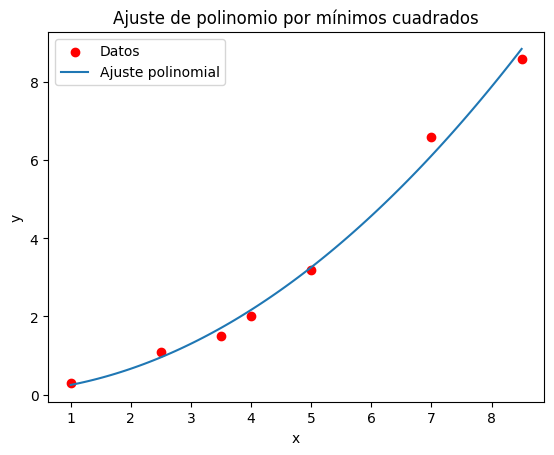

In [4]:
# 4.1)

x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

X = np.column_stack([np.ones_like(x), x, x**2])

c, residuals, rank, s = linalg.lstsq(X, y)
print("Coeficientes del polinomio ajustado:")
print(c)

# 4.2)

x_fit = np.linspace(min(x), max(x), 100)
y_fit = c[0] + c[1]*x_fit + c[2]*x_fit**2
plt.scatter(x, y, color='red', label='Datos') 
plt.plot(x_fit, y_fit, label='Ajuste polinomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de polinomio por mínimos cuadrados')
plt.show()


## **Ejercicio 5)** pseudo-inversa de Moore-Penrose de una matriz

La pseudo-inversa de Moore-Penrose es una generalización de la noción de inversa, que resulta útil porque existe para cualquier matriz de dimensiones y entradas arbitrarias sobre los números reales o complejos.

Si una matriz $A$ es invertible (y por ende cuadrada), existe una matriz $B$ tal $AB=BA=\mathbb{I}$. Dicha matríz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^{-1}$ y se la denomina inversa de $A$.

Si $A$ no es invertible, luego no existe una matriz $B$ para la cual se cumpla la primera condición $AB=BA=\mathbb{I}$. Sin embargo, se puede ver que siempre existe una matriz $B$ para la cual se cumple:

- $ABA = A$,
- $BAB=B$,
- $AB$ es hermitiana, y
- $BA$ es hermitiana.

Dicha matriz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^+$ y se la denomina matríz pseudo-inversa de Moore-Penrose de $A$.

Referencias:

- https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv

**1)** Cree una matriz $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$ de números aleatorios generados a partir de la distribución normal de media 0 y varianza 1.

**2)** Use `linalg.pinv()` para computar la psuedo-inversa de Moore-Penrose $A^+$ de $A$.

**3)** Que dimensiones tiene $A^+$?

**4)** Use `np.allclose()` para verifique que $AA^+A\approx A$.

**5)** Verifique que $A^+AA^+\approx A^+$.


In [7]:
# 5.1)
print("Inciso 5.1)")
n, m = 9, 6
A = np.random.normal(0, 1, (n, m))
print("Matriz A:")
print(A)

Inciso 5.1)
Matriz A:
[[-1.54930086 -1.30123011  0.6383766   1.00658435  1.42075949  0.408305  ]
 [ 1.31380765 -1.27159337 -0.37240786  0.14170791 -0.47986062 -1.26781638]
 [ 1.04156231  0.59169922  1.33181038  1.08031223 -0.14518437  1.01064568]
 [-0.31494836 -0.28480297 -0.87903606 -0.92893553  1.14296043 -0.3933169 ]
 [-0.22107579 -0.02243469  0.17068375  0.80952673 -0.31896858  0.98099564]
 [ 0.08853524 -1.97662954 -1.62176564  0.7506178  -0.23523957 -1.2778023 ]
 [-0.42708417  0.99667931  0.51383634  0.16964484 -0.58986225  0.43635267]
 [-1.31646063 -1.0797888   0.92067438 -1.15057069  1.0140382   0.16243957]
 [-0.98191508  0.50187973 -0.89128361  1.60940297  1.5533572  -0.04584372]]


In [8]:
# 5.2)
print("\nInciso 5.2)")
A_pinv = linalg.pinv(A)
print("\nPseudo-inversa de A (A^+):")
print(A_pinv)


Inciso 5.2)

Pseudo-inversa de A (A^+):
[[-1.28385198e-01  1.43485693e-01  3.50412337e-01  2.58379816e-01
   5.91528264e-02 -7.18259419e-02 -3.50161672e-01 -1.09344591e-01
  -5.59316668e-02]
 [-1.25262127e-01 -2.26002304e-02 -6.77260596e-02 -7.15176388e-02
  -2.61745107e-01 -2.03108522e-01  1.99514536e-01 -1.05822121e-01
   2.14218340e-01]
 [ 1.84094899e-01  2.57119116e-01  1.18615504e-01 -3.13910294e-01
  -3.78309990e-01 -2.00466287e-01  2.09395861e-01  1.91164184e-01
  -2.09063079e-04]
 [ 1.40756048e-01  1.00035966e-01  9.30270217e-02 -2.27418839e-01
  -3.12081017e-02  8.30634110e-02  1.18912540e-01 -1.21153087e-01
   2.08606821e-01]
 [ 5.29192082e-02  7.12191350e-02  2.22866562e-01  3.20076584e-01
  -1.32801401e-01 -1.73301158e-01 -2.76618043e-01  5.23259198e-02
   2.09969657e-01]
 [-6.96170215e-02 -4.12093090e-01  1.96241447e-01  3.75212281e-01
   7.44636733e-01  8.53394474e-02 -3.83015111e-01 -6.70262971e-02
  -2.57228533e-01]]


In [9]:
# 5.3)
print("\nInciso 5.3)")
print("\nDimensiones de A^+:")
print(A_pinv.shape)

# 5.4)
print("\nInciso 5.4)")
I_approx3 = np.dot(A, np.dot(A_pinv, A))
print("\nVerificación de AA^+A ≈ A:")
print(np.allclose(I_approx3, A))  # Debería ser True    

# 5.5)
print("\nInciso 5.5)")
I_approx4 = np.dot(A_pinv, np.dot(A, A_pinv))
print("\nVerificación de A^+AA^+ ≈ A^+:")
print(np.allclose(I_approx4, A_pinv))  # Debería ser True


Inciso 5.3)

Dimensiones de A^+:
(6, 9)

Inciso 5.4)

Verificación de AA^+A ≈ A:
True

Inciso 5.5)

Verificación de A^+AA^+ ≈ A^+:
True


## **Ejercicio 6)** Producto de Kronecker

Considere las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
A*{11} & \dots & A*{1m} \\
\vdots & \ddots & \vdots \\
A*{nm} & \dots & A*{nm}
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
B*{11} & \dots & B*{1s} \\
\vdots & \ddots & \vdots \\
B*{r1} & \dots & B*{rs}
\end{array}
\right)
\end{equation}

El producto de Kronecker es la matriz de dimensiones $nr\times ms$ dada por

\begin{equation}
A\otimes B
=
\left(
\begin{array}{cc}
A*{11}B & \dots & A*{1m}B \\
\vdots & \ddots & \vdots \\
A*{n1}B & \dots & A*{nm}B
\end{array}
\right)
=
\left(
\begin{array}{cc}
B*{11}A & \dots & B*{1s}A \\
\vdots & \ddots & \vdots \\
B*{r1}A & \dots & B*{rs}A
\end{array}
\right)
\end{equation}

donde $A_{ij}B$ es un bloque de la matriz $A\otimes B$ igual al producto del escalar $A_{ij}$ por la matriz $B$.
Idem para $B_{ij}A$.

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.kron.html#scipy.linalg.kron

**1)** Use `linalg.kron()` para calcular el producto de Kronecker de las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 \\
1 \\
1 \\
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este caso?

**2)** Repita para las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 & 1 & 1
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este otro caso?


In [12]:
#6.1)
print("\nInciso 6.1)")
A = np.array([[1, 2], [3, 4]])
B = np.array([[1], [1], [1]])

#Kronecker
K = linalg.kron(A, B)
print("\nMatriz Kronecker de A y B:")
print(K)
print("\nDimensiones de la matriz Kronecker:")
print(K.shape)  # Debería ser (6, 2)


Inciso 6.1)

Matriz Kronecker de A y B:
[[1 2]
 [1 2]
 [1 2]
 [3 4]
 [3 4]
 [3 4]]

Dimensiones de la matriz Kronecker:
(6, 2)


C:\Users\Freddy\AppData\Local\Temp\ipykernel_15748\2416882782.py:7: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  K = linalg.kron(A, B)


In [13]:
#6.2)
print("\nInciso 6.2)")
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 1, 1]])

#Kronecker
K = linalg.kron(A, B)
print("\nMatriz Kronecker de A y B:")
print(K)
print("\nDimensiones de la matriz Kronecker:")
print(K.shape)  # Debería ser (2, 6)


Inciso 6.2)

Matriz Kronecker de A y B:
[[1 1 1 2 2 2]
 [3 3 3 4 4 4]]

Dimensiones de la matriz Kronecker:
(2, 6)


C:\Users\Freddy\AppData\Local\Temp\ipykernel_15748\830716754.py:7: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  K = linalg.kron(A, B)


## **Ejercicio 7)** Autovalores y autovectores

Considere una matriz $A$ de $n\times m$. Luego, existen un conjunto de escalares $\{\lambda_1,...,\lambda_n\}$ y un correspondiente conjunto de vectores distintos $\{v_1,...,v_n\}$ tales que

$$
Av_i = \lambda_i v_i \quad (1)
$$

para todo $i\in\{1,...,n\}$. Estos $\lambda_i$ y $v_i$ se denominan autovalores y autovectores a derecha de $A$, respectivamente. Los autovalores pueden repetirse, pueden ser nulos y se los suele ordenar de mayor a menor en orden descendiente de sus valores absolutos: $|\lambda_1|\geq |\lambda_2|\geq ...\geq |\lambda_n|\geq 0$. Los autovectores pueden normalizarse, ya que si $v_i$ es autovector, luego $v_i/|v_i|$ también lo es.

Los autovectores constituyen una base del dominio de $A$. Esto es muy útil porque permite escribir cualquier vector $v$ en el dominio de $A$ como una combinación lineal de sus autovectores:

$$
v = \sum_i c_i v_i
$$

Luego, calcular el producto de $A$ con $v$ resulta muy simple:

$$
Av = A\left(\sum_i c_i v_i\right) = \sum_i c_iAv_i = \sum_i c_i\lambda_i v_i
$$

Análogamente, existen un conjunto de escalares $\{\mu_1,...,\mu_m\}$ y un correspondiente conjunto de vectores diferentes $\{u_1,...,u_m\}$ de $A$, llamados autovalores y autovectores a izquierda de $A$, respectivamente, y son tales que

$$
u_jA = \mu_j u_j \quad (2)
$$

para todo $j\in\{1,...,m\}$.

---

**1)** Use `linalg.eigvals()` para calcular los autovalores a derecha de la matriz:

$$
A = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
$$

**2)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a derecha de $A$.

**3)** Verifique que la ecuación $(1)$ se cumple.

**4)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a izquierda de $A$.

**5)** Verifique que la ecuación $(2)$ se cumple.

---

**Referencia**:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig


In [14]:
#7.1)
print("\nInciso 7.1)")
A = np.array([[0, -1], [1, 0]])
#Autovalores a derecha de A
eigenvalues_r= linalg.eigvals(A)
print("\nAutovalores de A (a derecha):")
print(eigenvalues_r)

# 7.2)
eigenvalues, eigenvectors = linalg.eig(A)
print("Autovalores de A:")
print(eigenvalues)
print("Autovectores de A:")
print(eigenvectors)

# 7.3)
print("\nInciso 7.3)")
# Verificación de la ecuación (1)
for i in range(len(eigenvalues)):
    Av = np.dot(A, eigenvectors[:, i])
    lambda_v = eigenvalues[i] * eigenvectors[:, i]
    print(f"\nVerificación para autovalor {eigenvalues[i]} y autovector {eigenvectors[:, i]}:")
    print("Av =", Av)
    print("λv =", lambda_v)
    print("¿Son iguales?", np.allclose(Av, lambda_v))  # Debería ser True


Inciso 7.1)

Autovalores de A (a derecha):
[0.+1.j 0.-1.j]
Autovalores de A:
[0.+1.j 0.-1.j]
Autovectores de A:
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]

Inciso 7.3)

Verificación para autovalor 1j y autovector [0.70710678+0.j         0.        -0.70710678j]:
Av = [0.        +0.70710678j 0.70710678+0.j        ]
λv = [0.        +0.70710678j 0.70710678+0.j        ]
¿Son iguales? True

Verificación para autovalor -1j y autovector [0.70710678-0.j         0.        +0.70710678j]:
Av = [0.        -0.70710678j 0.70710678+0.j        ]
λv = [0.        -0.70710678j 0.70710678+0.j        ]
¿Son iguales? True


In [16]:
#7.4)
print("\nInciso 7.4)")
eigenvalues_l, left_eigenvectors = linalg.eig(A, left=True, right=False)
print("\nAutovalores de A (a izquierda):")
print(eigenvalues_l)
print("Autovectores de A (a izquierda):")
print(left_eigenvectors)

# 7.5)
print("\nInciso 7.5)")
# Verificación de la ecuación (2)
for j in range(len(eigenvalues_l)):
    u = left_eigenvectors[:, j]   
    uA = np.dot(u.conj().T, A)   
    mu_u = eigenvalues_l[j] * u.conj().T
    print(f"\nVerificación para autovalor {eigenvalues_l[j]} y autovector {left_eigenvectors[j, :]}:")
    print("uA =", uA)
    print("μu =", mu_u)
    print("¿Son iguales?", np.allclose(uA, mu_u))  # Debería ser True


Inciso 7.4)

Autovalores de A (a izquierda):
[0.+1.j 0.-1.j]
Autovectores de A (a izquierda):
[[-0.70710678+0.j         -0.70710678-0.j        ]
 [ 0.        +0.70710678j  0.        -0.70710678j]]

Inciso 7.5)

Verificación para autovalor 1j y autovector [-0.70710678+0.j -0.70710678-0.j]:
uA = [0.        -0.70710678j 0.70710678+0.j        ]
μu = [0.        -0.70710678j 0.70710678+0.j        ]
¿Son iguales? True

Verificación para autovalor -1j y autovector [0.+0.70710678j 0.-0.70710678j]:
uA = [0.        +0.70710678j 0.70710678+0.j        ]
μu = [0.        +0.70710678j 0.70710678+0.j        ]
¿Son iguales? True


## **Ejercicio 8)** Singular Value Decomposition (SVD)

Una matriz compleja $A$ de dimensiones $n\times m$ se la puede pensar como una transformación lineal $A:V\to W$ desde un espacio vectorial $V$ de dimensión $m$ a un espacio vectorial $W$ de dimensión $n$.
A $V$ se lo suele llamar espacio de salida y a $W$ espacio de llegada.

Cualquiera sea $A$, siempre existen matrices $L$, $D$ y $R$, de dimensiones $n\times n$, $n\times m$ y $m\times m$, respectivamente, tales que $L$ y $R$ son unitarias, $D$ es diagonal y

$$
A = LDR^{\dagger} \quad (1)
$$

Los valores diagonales

$$
\sigma_i := D_{ii}
$$

están definidos para todo $i\in \{1,...,k\}$, donde $k=\min(n,m)$.
Se los denomina **valores singulares** de $A$, son todos reales y no-negativos.
La descomposición siempre puede realizarse de manera tal que $\sigma_1\geq \sigma_2 \geq ... \geq \sigma_k\geq 0$.
El número de valores singulares no nulos es el rango de $A$.

Los vectores columna $l_1,...,l_n$ de $L$ forman una base ortonormal del espacio vectorial de llegada $W$.
Los vectores columna $r_1,...,r_m$ de $R$ forman una base ortonormal del espacio vectorial de salida $V$.
Usando estas propiedades, la ecuación $(1)$ puede reescribirse como

$$
A = \sum_{i=1}^k \sigma_i \, (l_i \otimes r_i^{\dagger}) \quad (2)
$$

donde $l_i \otimes r_i^{\dagger}$ es la matriz de dimensiones $n\times m$ resultante del [producto exterior](https://en.wikipedia.org/wiki/Outer_product#Connection_with_the_Kronecker_product) entre la matriz $l_i$ de dimensiones $n\times 1$ y la matriz $r_i^{\dagger}$ de dimensiones $1\times m$.
En otras palabras, la $jk$-ésima entrada de la matriz $l_i \otimes r_i^{\dagger}$ es

$$
(l_i \otimes r_i^{\dagger})_{jk} =
(l_i)_{j1} \, (r_i^{\dagger})_{1k}
$$

para cada $j\in \{1,...,n\}$ y $k \in \{1,...,m\}$, donde

$$
(r_i^{\dagger})_{1k} = (r_i)_{k1}^{*}
$$

i.e. es el complejo conjugado de la $k1$-ésima entrada de la traspuesta de la matriz $r_i$.

---

**Referencias**:

- https://en.wikipedia.org/wiki/Singular_value_decomposition
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd

---

**1)** Cree una matriz compleja $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$, cuyas entradas $a_{ij} = x_{ij} + i y_{ij}$ se computen generando números aleatorios $x_{ij}$ e $y_{ij}$ a partir de una distribución normal de media 0 y varianza 1.

**2)** Use `linalg.svd()` para calcular la SVD de $A$.  
Dicha función retorna 3 arrays, digamos `L`, `s` y `Rc`, donde `L` denota a la matriz $L$, `s` denota al vector de valores singulares $(\sigma_1,\sigma_2,...,\sigma_k)$ y `Rc` denota a la matriz compleja conjugada $R^{\dagger}$.  
Inspeccione las dimensiones de los arrays retornados.

**3)** Use el vector `s` para crear la matriz diagonal $D$ de dimensiones $n\times m$.

**4)** Use `np.allclose()` para verificar numéricamente la ecuación $(1)`.


In [19]:
# 8.1)

print("\nInciso 8.1)")
n, m = 9, 6
A = np.random.normal(0, 1, (n, m)) + 1j * np.random.normal(0, 1, (n, m))
print("Matriz A:")
print(A)


Inciso 8.1)
Matriz A:
[[-0.9557032 +2.23207082j -1.87935454-0.553022j   -0.04672746+0.62568647j
   0.17743334+0.58186686j -0.58960539-0.79253905j  0.21040814-0.80873629j]
 [ 0.18590982-0.84901831j  0.30789022-1.79184643j -0.41911245-1.56734261j
  -0.02350266+0.46393151j  0.59498422-0.15018202j -0.09771849+1.07268478j]
 [-0.69677685-1.63218601j -0.08185313-1.77869831j -0.96233282-1.49464967j
  -0.23194392-0.91272483j  0.04365581+0.74245086j -1.56989879-0.47750983j]
 [-0.88898819+0.94246508j  0.65672678+0.46477079j -0.21829175+1.19954353j
   0.0881744 +0.78161152j -1.61221698+0.45653832j  0.60432053+0.75358324j]
 [-0.08815263-1.1259129j   0.15745141+0.87707924j  2.06349425-0.62852548j
   0.99709203+0.78324379j  0.90466589+0.88204302j  1.00664415-0.24388676j]
 [ 0.75323719+1.83977938j  1.92088592-0.16066087j -0.05713764+0.21492691j
  -1.00277632-0.29370072j  0.52277118-0.53024798j -0.05437412+0.12700268j]
 [-0.0596325 +0.22815587j  0.35401069-0.51675032j -0.54021844+0.46009539j
   0.2552

In [20]:
# 8.2)
print("\nInciso 8.2)")
U, s, Rc = linalg.svd(A, full_matrices=True)
print("\nMatriz U (L):")
print(U)
print("\nVector de valores singulares (s):")
print(s)
print("\nMatriz Rc (R†):")
print(Rc)
print("\nDimensiones de U:", U.shape)
print("Dimensiones de s:", s.shape)
print("Dimensiones de Rc:", Rc.shape)


Inciso 8.2)

Matriz U (L):
[[-0.24349371+0.32586134j -0.05782667-0.03775109j  0.12920614-0.32715206j
   0.1725151 -0.55391747j  0.18024126-0.42475122j -0.09748911+0.01180556j
   0.01588865+0.14022319j  0.18638941+0.25506342j -0.14691124-0.07488079j]
 [-0.09585934-0.36280616j -0.14824205-0.02865511j  0.11557126+0.2940947j
   0.1336511 -0.06449621j -0.26499786-0.26106239j -0.21823638-0.25937777j
  -0.00694763+0.02567678j  0.02700468-0.21629717j -0.60608434+0.21371516j]
 [-0.16308121-0.46562112j  0.07377734+0.16260805j -0.23453224+0.14840802j
  -0.05879662-0.45680573j  0.16094963+0.22631987j  0.37330037-0.05479528j
   0.11484598-0.08274584j  0.34236227+0.15175791j  0.09537405+0.21610639j]
 [-0.01719064+0.30321401j  0.1540659 -0.16483226j  0.10034522+0.39251892j
   0.27498921+0.00377051j  0.01073887+0.03206728j  0.13653979+0.54236363j
  -0.14478713-0.2759514j   0.37319387-0.20928008j -0.12974195+0.07825526j]
 [ 0.32857103-0.08015599j  0.23302592+0.3088905j   0.49638196-0.12944397j
   0.10

In [21]:
# 8.3)
print("\nInciso 8.3)")
D = np.zeros((n, m), dtype=complex)
for i in range(min(n, m)):
    D[i, i] = s[i]
print("\nMatriz diagonal D:")
print(D)

# 8.4)
print("\nInciso 8.4)")
A_reconstructed = np.dot(U, np.dot(D, Rc))
print("\nVerificación de A = LDR†:")
print(np.allclose(A, A_reconstructed))  # Debería ser True


Inciso 8.3)

Matriz diagonal D:
[[6.18453448+0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 4.10447702+0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 3.46823072+0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 2.94170185+0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  2.49493988+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 1.91776824+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]]

Inciso 8.4)

Verificación de A = LDR†:
True
